<a href="https://colab.research.google.com/github/TrinhBaThinh-257275/BTVN-AI/blob/nopbai/Nhan_dien_khuon_mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#khai bao
from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/BT/Face/

/content/drive/MyDrive/Colab Notebooks/BT/Face


In [ ]:
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2 , zoom_range = 0.2, horizontal_flip = True) 

In [ ]:
train=train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT/Face/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 135 images belonging to 3 classes.


In [ ]:
test = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT/Face/Test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 45 images belonging to 3 classes.


In [ ]:
train.class_indices

{'Minh': 0, 'Thanh': 1, 'Thinh': 2}

In [ ]:
test.class_indices

{'Minh': 0, 'Thanh': 1, 'Thinh': 2}

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train,epochs=20,batch_size=128,verbose=1, validation_data=test, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/20
5/5 [==============================] - 88s 15s/step - loss: 4.4449 - accuracy: 0.3704 - val_loss: 2.5476 - val_accuracy: 0.3333
Epoch 2/20
5/5 [==============================] - 8s 2s/step - loss: 1.3847 - accuracy: 0.4222 - val_loss: 0.8335 - val_accuracy: 0.5778
Epoch 3/20
5/5 [==============================] - 8s 2s/step - loss: 0.9608 - accuracy: 0.5852 - val_loss: 0.3402 - val_accuracy: 0.8889
Epoch 4/20
5/5 [==============================] - 8s 2s/step - loss: 0.5443 - accuracy: 0.8148 - val_loss: 3.4386 - val_accuracy: 0.3333
Epoch 5/20
5/5 [==============================] - 8s 2s/step - loss: 1.0884 - accuracy: 0.7556 - val_loss: 0.1292 - val_accuracy: 0.9333
Epoch 6/20
5/5 [==============================] - 8s 2s/step - loss: 0.0558 - accuracy: 0.9778 - val_loss: 0.0426 - val_accuracy: 0.9778
Epoch 7/20
5/5 [==============================] - 8s 2s/step - loss: 0.0223 - accuracy: 0.9852 - val_loss: 4.4310e-04 - val_accuracy: 1.0000
Epoch 8/20
5/5 [===================

In [ ]:
model.save("Nhan_dien_nguoi.h5")

In [ ]:
model_CNN=load_model('Nhan_dien_nguoi.h5')

1/1 [==============================] - 0s 15ms/step
Thanh


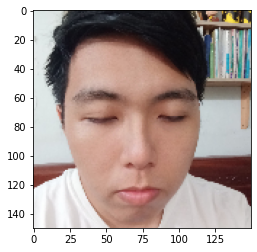

1/1 [==============================] - 0s 20ms/step
Thinh


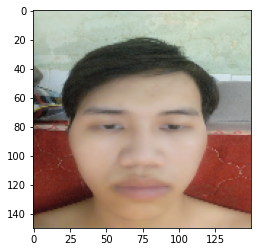

1/1 [==============================] - 0s 16ms/step
Minh


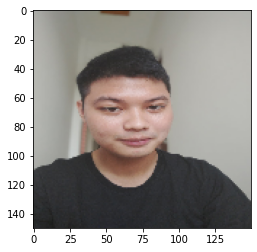

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/BT/Face/Attempt"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Minh'
  if round(result[0][1])==1:
    prediction='Thanh'
  if round(result[0][2])==1:
    prediction='Thinh'
  print(prediction)
  plt.show()